In [189]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df=pd.read_csv("E:\\MY Research\\My Writing\\2nd Submission\\file9.csv")
df
df_original=df
# Convert 'Date/Time' column to datetime
df_original['Date/Time'] = pd.to_datetime(df_original['Date/Time'])

df_original

,Source_Country,Destination_Country,Industry,Type_of_Attack,Client,Number of requests,Date/Time
0,United States,Poland,Healthcare,Automated Threat - Automated Attack,Hacking Tool,8,2023-04-28 02:53:35
1,United States,South Africa,Telecom and ISPs,Automated Threat - Automated Attack,Hacking Tool,11,2023-04-28 02:53:35
2,Brazil,Brazil,Financial Services,Automated Threat - Business Logic,Bot,6,2023-04-28 02:53:35
3,Germany,United Kingdom,Telecom and ISPs,OWASP - API Violation,Browser Automation,105,2023-04-28 02:53:35
4,Germany,Russia,Travel,Automated Threat - Business Logic,Browser Automation,39,2023-04-28 02:53:35
...,...,...,...,...,...,...,...
366810,Brazil,Brazil,NaN,OWASP - API Violation,Bot,1944,2023-05-18 00:02:45
366811,Spain,United States,Gambling,OWASP - Data Leakage,Bot,5,2023-05-18 00:02:45
366812,Canada,Colombia,Financial Services,OWASP - API Violation,Browser Automation,198,2023-05-18 00:02:45
366813,France,France,Business,OWASP - API Violation,Browser Automation,22,2023-05-18 00:02:45


In [190]:
df['Destination_Country'].value_counts()[0:10]

United States     149425
United Kingdom     26341
Australia          16629
France             13760
Canada             10479
Singapore           9595
Brazil              9428
Japan               8895
Spain               8132
Malaysia            7331
Name: Destination_Country, dtype: int64

C:\Users\nsrtk\AppData\Local\Temp/ipykernel_26324/1302060390.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us['Date/Time'] = pd.to_datetime(df_us['Date/Time'])
C:\Users\nsrtk\AppData\Local\Temp/ipykernel_26324/1302060390.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us['Hour'] = df_us['Date/Time'].dt.hour


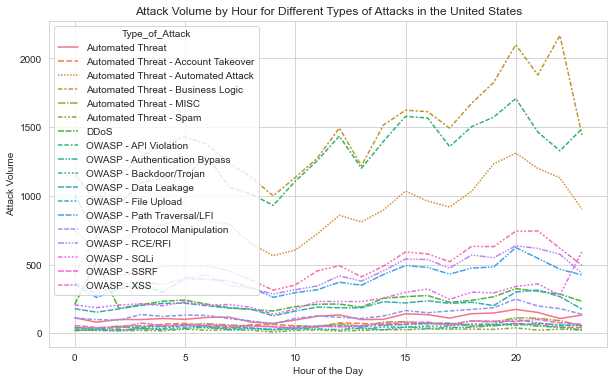

In [191]:
#Without filling missing values

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=df_original



# Filter the data for the United States
df_us = df[df['Destination_Country'] == 'United States']

# Convert the Datetime column to a datetime object and extract the hour of the day
df_us['Date/Time'] = pd.to_datetime(df_us['Date/Time'])
df_us['Hour'] = df_us['Date/Time'].dt.hour

# Group the data by Hour and Types of Attack and calculate the count of attacks
df_us_grouped = df_us.groupby(['Hour', 'Type_of_Attack']).size().reset_index(name='Attack_Volume')

# Pivot the table to have Types of Attack as columns
df_us_pivot = df_us_grouped.pivot(index='Hour', columns='Type_of_Attack', values='Attack_Volume')

# Create the plot using seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_us_pivot)
plt.title('Attack Volume by Hour for Different Types of Attacks in the United States')
plt.xlabel('Hour of the Day')
plt.ylabel('Attack Volume')
plt.show()


C:\Users\nsrtk\AppData\Local\Temp/ipykernel_26324/2194113765.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us['Date/Time'] = pd.to_datetime(df_us['Date/Time'])
C:\Users\nsrtk\AppData\Local\Temp/ipykernel_26324/2194113765.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us['Hour'] = df_us['Date/Time'].dt.hour


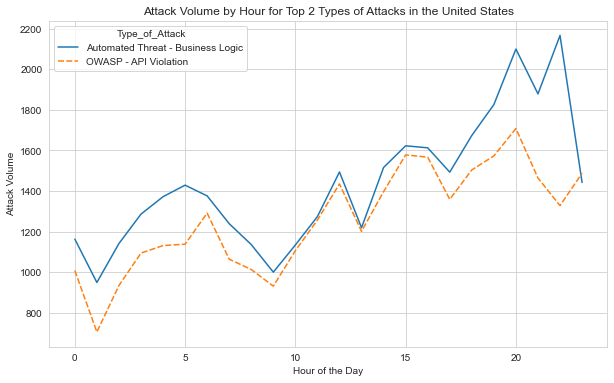

In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = df_original

# Filter the data for the United States
df_us = df[df['Destination_Country'] == 'United States']

# Convert the Datetime column to a datetime object and extract the hour of the day
df_us['Date/Time'] = pd.to_datetime(df_us['Date/Time'])
df_us['Hour'] = df_us['Date/Time'].dt.hour

# Group the data by Hour and Types of Attack and calculate the count of attacks
df_us_grouped = df_us.groupby(['Hour', 'Type_of_Attack']).size().reset_index(name='Attack_Volume')

# Get the top 2 types of attacks
top_attacks = df_us_grouped.groupby('Type_of_Attack')['Attack_Volume'].sum().nlargest(2).index

# Filter the data for the top 2 types of attacks
df_us_top_attacks = df_us_grouped[df_us_grouped['Type_of_Attack'].isin(top_attacks)]

# Pivot the table to have Types of Attack as columns
df_us_pivot = df_us_top_attacks.pivot(index='Hour', columns='Type_of_Attack', values='Attack_Volume')

# Create the plot using seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_us_pivot)
plt.title('Attack Volume by Hour for Top 2 Types of Attacks in the United States')
plt.xlabel('Hour of the Day')
plt.ylabel('Attack Volume')
plt.show()


In [193]:
df_us_pivot

Type_of_Attack,Automated Threat - Business Logic,OWASP - API Violation
Hour,,
0,1163,1008
1,949,705
2,1141,934
3,1286,1094
4,1372,1131
5,1429,1138
6,1376,1291
7,1239,1064
8,1136,1013


In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for the United States
df_us = df_original[df_original['Destination_Country'] == 'United States']

# Convert the Datetime column to a datetime object and extract the day, month, year, hour, and minute
df_us['DateTime'] = pd.to_datetime(df_us['Date/Time'])
df_us['Date'] = df_us['DateTime'].dt.date
df_us['Hour'] = df_us['DateTime'].dt.hour
df_us['Minute'] = df_us['DateTime'].dt.minute

# Create a new column to group the data by hour and 15-minute interval
df_us['Hour_15min'] = df_us['Hour'].astype(str) + '-' + (df_us['Minute'] // 15).astype(str)

# Filter out the rows where there is no data for a particular hour
available_hours = df_us['Hour'].unique()
df_us = df_us[df_us['Hour'].isin(available_hours)]

# Group the data by Date, Hour_15min, and Types of Attack and calculate the count of attacks
df_us_grouped = df_us.groupby(['Date', 'Hour_15min', 'Type_of_Attack']).size().reset_index(name='Attack_Volume')

# Pivot the table to have Types of Attack as columns
df_us_pivot = df_us_grouped.pivot(index=['Date', 'Hour_15min'], columns='Type_of_Attack', values='Attack_Volume')


C:\Users\nsrtk\AppData\Local\Temp/ipykernel_26324/3821415414.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us['DateTime'] = pd.to_datetime(df_us['Date/Time'])
C:\Users\nsrtk\AppData\Local\Temp/ipykernel_26324/3821415414.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us['Date'] = df_us['DateTime'].dt.date
C:\Users\nsrtk\AppData\Local\Temp/ipykernel_26324/3821415414.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [195]:
df_us_pivot

Type_of_Attack         Automated Threat  Automated Threat - Account Takeover  \
Date       Hour_15min                                                          
2023-04-28 14-2                     1.0                                  NaN   
           14-3                     1.0                                  1.0   
           15-0                     2.0                                  1.0   
           15-1                     4.0                                  NaN   
           15-2                     2.0                                  NaN   
...                                 ...                                  ...   
2023-05-17 9-0                      1.0                                  1.0   
           9-1                      NaN                                  2.0   
           9-2                      2.0                                  2.0   
           9-3                      1.0                                  NaN   
2023-05-18 0-0                      1.0                                  1.0   

Type_of_Attack         Automated Threat - Automated Attack  \
Date       Hour_15min                                        
2023-04-28 14-2                                        7.0   
           14-3                                       25.0   
           15-0                                       24.0   
           15-1                                       17.0   
           15-2                                       24.0   
...                                                    ...   
2023-05-17 9-0                                        11.0   
           9-1                                         6.0   
           9-2                                        17.0   
           9-3                                        13.0   
2023-05-18 0-0                                         NaN   

Type_of_Attack         Automated Threat - Business Logic  \
Date       Hour_15min                                      
2023-04-28 14-2                                     13.0   
           14-3                                     32.0   
           15-0                                     41.0   
           15-1                                     32.0   
           15-2                                     34.0   
...                                                  ...   
2023-05-17 9-0                                      18.0   
           9-1                                      19.0   
           9-2                                      16.0   
           9-3                                      24.0   
2023-05-18 0-0                                       7.0   

Type_of_Attack         Automated Threat - MISC  Automated Threat - Spam  DDoS  \
Date       Hour_15min                                                           
2023-04-28 14-2                            1.0                      1.0   5.0   
           14-3                            1.0                      1.0  10.0   
           15-0                            2.0                      NaN   8.0   
           15-1                            1.0                      NaN  12.0   
           15-2                            2.0                      NaN   7.0   
...                                        ...                      ...   ...   
2023-05-17 9-0                             1.0                      1.0   4.0   
           9-1                             2.0                      NaN   2.0   
           9-2                             2.0                      1.0   2.0   
           9-3                             2.0                      NaN   4.0   
2023-05-18 0-0                             1.0                      NaN   NaN   

Type_of_Attack         OWASP - API Violation  OWASP - Authentication Bypass  \
Date       Hour_15min                                                         
2023-04-28 14-2                          6.0                            NaN   
           14-3                         35.0                            1.0   
 

In [196]:
import pandas as pd

# Assuming that you already have a pivot table called 'pivot_table'

# Convert the pivot table to a dataframe
df1 = pd.DataFrame(df_us_pivot.to_records())
df1['Date'] = pd.to_datetime(df1['Date'])




# Display the dataframe
print(df1)


           Date Hour_15min  Automated Threat  \
0    2023-04-28       14-2               1.0   
1    2023-04-28       14-3               1.0   
2    2023-04-28       15-0               2.0   
3    2023-04-28       15-1               4.0   
4    2023-04-28       15-2               2.0   
...         ...        ...               ...   
1084 2023-05-17        9-0               1.0   
1085 2023-05-17        9-1               NaN   
1086 2023-05-17        9-2               2.0   
1087 2023-05-17        9-3               1.0   
1088 2023-05-18        0-0               1.0   

      Automated Threat - Account Takeover  \
0                                     NaN   
1                                     1.0   
2                                     1.0   
3                                     NaN   
4                                     NaN   
...                                   ...   
1084                                  1.0   
1085                                  2.0   
1086              

In [197]:
import pandas as pd
import numpy as np

# Assuming that you already have a dataframe called 'df1' with columns 'Automated Threat - Business Logic', 'Hour', 'Year', 'Month', 'Day'

# Define the start and end dates for the desired date range
start_date = '2023-05-11'
end_date = '2023-05-18'

# Filter the dataframe based on the date range
df1_filtered = df1[(df1['Date'] >= start_date) & (df1['Date'] <= end_date)]

# Select the desired columns and rename 'Automated Threat - Business Logic' column to 'Attack Volume'
df1_selected = df1_filtered[['OWASP - API Violation', 'Hour_15min', 'Date']].rename(columns={'OWASP - API Violation': 'Attack_Volume'})

# Replace NaN values with 0 in the 'Attack Volume' column
df1_selected['Attack_Volume'] = df1_selected['Attack_Volume'].fillna(0)

# Display the resulting dataframe
print(df1_selected)


      Attack_Volume Hour_15min       Date
551            42.0        0-0 2023-05-11
552            36.0        0-1 2023-05-11
553            39.0        0-2 2023-05-11
554            29.0        0-3 2023-05-11
555            38.0        1-0 2023-05-11
...             ...        ...        ...
1084           18.0        9-0 2023-05-17
1085           22.0        9-1 2023-05-17
1086           30.0        9-2 2023-05-17
1087           25.0        9-3 2023-05-17
1088            5.0        0-0 2023-05-18

[538 rows x 3 columns]


In [198]:

df1_selected['Attack_Volume'] = df1_selected['Attack_Volume'].astype('int32')
print(df1_selected.dtypes)
print(df1_selected)

Attack_Volume             int32
Hour_15min               object
Date             datetime64[ns]
dtype: object
      Attack_Volume Hour_15min       Date
551              42        0-0 2023-05-11
552              36        0-1 2023-05-11
553              39        0-2 2023-05-11
554              29        0-3 2023-05-11
555              38        1-0 2023-05-11
...             ...        ...        ...
1084             18        9-0 2023-05-17
1085             22        9-1 2023-05-17
1086             30        9-2 2023-05-17
1087             25        9-3 2023-05-17
1088              5        0-0 2023-05-18

[538 rows x 3 columns]


In [199]:
#df1_selected=pd.read_csv("output1.csv")


In [200]:
print(df1_selected.dtypes)

Attack_Volume             int32
Hour_15min               object
Date             datetime64[ns]
dtype: object


In [201]:
import pandas as pd
import numpy as np

# Create a list of all possible combinations of date and hour for the given date range
hours = pd.date_range(start='2023-05-11', end='2023-05-18', freq='H')

# Create an empty list to store the dataframes for each hour
df_list = []

# Iterate over each hour
for hour in hours:
    # Create a dataframe with all possible combinations of date and hour for the current hour with 15-minute intervals
    date_range = pd.date_range(start=hour, end=hour + pd.Timedelta(hours=1) - pd.Timedelta(minutes=15), freq='15T')
    df_hour = pd.DataFrame({'Date': date_range.date, 'Hour_15min': [f'{hour.hour}-{i}' for i in range(4)]})

    # Add the 'Attack_Volume' column filled with NaN values
    df_hour['Attack_Volume'] = np.nan

    # Append the dataframe to the list
    df_list.append(df_hour)

# Concatenate all dataframes in the list into a single dataframe
df_new = pd.concat(df_list, ignore_index=True)


In [202]:
df_new

,Date,Hour_15min,Attack_Volume
0,2023-05-11,0-0,NaN
1,2023-05-11,0-1,NaN
2,2023-05-11,0-2,NaN
3,2023-05-11,0-3,NaN
4,2023-05-11,1-0,NaN
...,...,...,...
671,2023-05-17,23-3,NaN
672,2023-05-18,0-0,NaN
673,2023-05-18,0-1,NaN
674,2023-05-18,0-2,NaN


In [203]:
df_new['Date'] = pd.to_datetime(df_new['Date'])
df1_selected['Date'] = pd.to_datetime(df1_selected['Date'])
print(df1_selected.dtypes)

Attack_Volume             int32
Hour_15min               object
Date             datetime64[ns]
dtype: object


In [204]:
merged_df = pd.merge(df_new, df1_selected, on=['Date', 'Hour_15min'], how='left')
merged_df['Attack_Volume_x'].fillna(merged_df['Attack_Volume_y'], inplace=True)
merged_df.drop('Attack_Volume_y', axis=1, inplace=True)
merged_df.rename(columns={'Attack_Volume_x': 'Attack_Volume'}, inplace=True)


In [205]:
df1_selected=merged_df
df1_selected_original=df1_selected
df1_selected


,Date,Hour_15min,Attack_Volume
0,2023-05-11,0-0,42.0
1,2023-05-11,0-1,36.0
2,2023-05-11,0-2,39.0
3,2023-05-11,0-3,29.0
4,2023-05-11,1-0,38.0
...,...,...,...
671,2023-05-17,23-3,19.0
672,2023-05-18,0-0,5.0
673,2023-05-18,0-1,NaN
674,2023-05-18,0-2,NaN


In [206]:
merged_df.to_excel('test_output.xlsx', index=False)

In [207]:
df1_selected=merged_df
df1_selected_original=df1_selected
df1_selected


,Date,Hour_15min,Attack_Volume
0,2023-05-11,0-0,42.0
1,2023-05-11,0-1,36.0
2,2023-05-11,0-2,39.0
3,2023-05-11,0-3,29.0
4,2023-05-11,1-0,38.0
...,...,...,...
671,2023-05-17,23-3,19.0
672,2023-05-18,0-0,5.0
673,2023-05-18,0-1,NaN
674,2023-05-18,0-2,NaN


Choosing the degree for polynomial interpolation depends on the nature and characteristics of the data. While there is no definitive rule for selecting the optimal degree, we tried different degrees and assessed the performance of the interpolation.We plotted our original data points to understand the pattern and any underlying trends. This gave us an idea of the overall shape of the data.

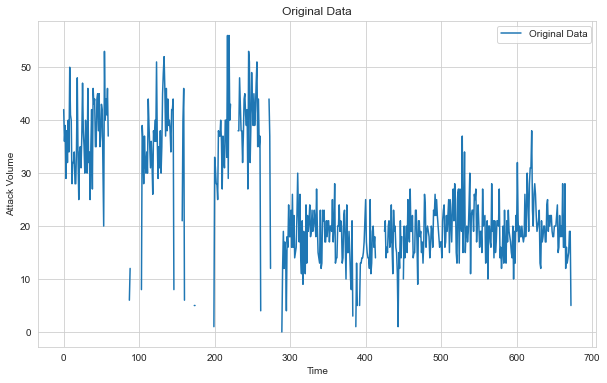

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df1_selected['Attack_Volume'], label='Original Data')
plt.xlabel('Time')
plt.ylabel('Attack Volume')
plt.title('Original Data')
plt.legend()
plt.show()


In [209]:
import pandas as pd
import numpy as np

# Load dataset
df = df1_selected_original

# Remove hyphen from Hour_10min column values
df['Hour_15min'] = df['Hour_15min'].str.replace('-', '')

# Identify missing values
missing_mask = df['Attack_Volume'].isnull()

# Perform polynomial interpolation
poly_degree = 3 # set the degree of the polynomial
x = df[~missing_mask]['Hour_15min'].astype(float)
y = df[~missing_mask]['Attack_Volume']
poly_coeffs = np.polyfit(x, y, poly_degree)
poly_func = np.poly1d(poly_coeffs)
df.loc[missing_mask, 'Attack_Volume'] = poly_func(df[missing_mask]['Hour_15min'].astype(float))

df1_selected=df


# Display interpolated dataset
print(df1_selected)


          Date Hour_15min  Attack_Volume
0   2023-05-11         00      42.000000
1   2023-05-11         01      36.000000
2   2023-05-11         02      39.000000
3   2023-05-11         03      29.000000
4   2023-05-11         10      38.000000
..         ...        ...            ...
671 2023-05-17        233      19.000000
672 2023-05-18         00       5.000000
673 2023-05-18         01      17.771895
674 2023-05-18         02      18.049987
675 2023-05-18         03      18.323785

[676 rows x 3 columns]


In [210]:
df1_selected

,Date,Hour_15min,Attack_Volume
0,2023-05-11,00,42.000000
1,2023-05-11,01,36.000000
2,2023-05-11,02,39.000000
3,2023-05-11,03,29.000000
4,2023-05-11,10,38.000000
...,...,...,...
671,2023-05-17,233,19.000000
672,2023-05-18,00,5.000000
673,2023-05-18,01,17.771895
674,2023-05-18,02,18.049987


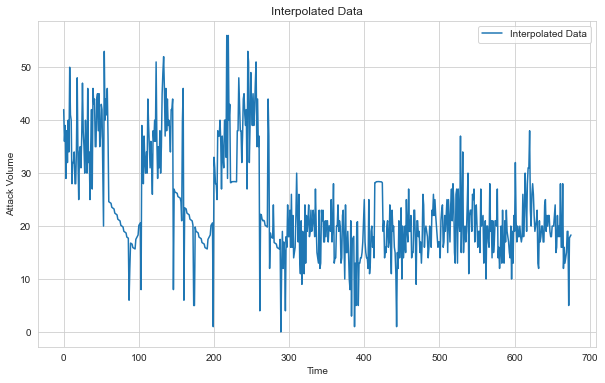

In [211]:
plt.figure(figsize=(10, 6))
plt.plot(df1_selected['Attack_Volume'], label='Interpolated Data')
plt.xlabel('Time')
plt.ylabel('Attack Volume')
plt.title('Interpolated Data')
plt.legend()
plt.show()

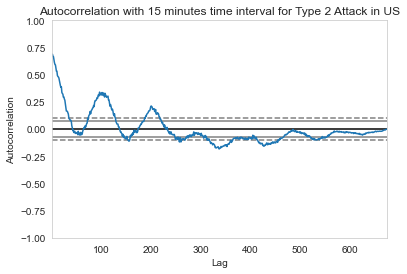

In [212]:
#Autocorrelation measurement
import pandas as pd
import matplotlib.pyplot as plt

# Plot the autocorrelation of the Attack_Volume feature
pd.plotting.autocorrelation_plot(df1_selected_original['Attack_Volume'])
plt.title('Autocorrelation with 15 minutes time interval for Type 2 Attack in US')
plt.show()


In [213]:
import pandas as pd


# Calculate the autocorrelation at a lag of 1 hour
autocorr_1h = df1_selected['Attack_Volume'].autocorr(lag=1)

# Print the autocorrelation value
print(f"The autocorrelation at a lag of 1 hour is {autocorr_1h:.3f}")


The autocorrelation at a lag of 1 hour is 0.691


In [214]:
import pandas as pd


# Calculate the autocorrelation at a lag of 1 hour
autocorr_1h = df1_selected['Attack_Volume'].autocorr(lag=2)

# Print the autocorrelation value
print(f"The autocorrelation at a lag of 2 hour is {autocorr_1h:.3f}")


The autocorrelation at a lag of 2 hour is 0.669


In [215]:
import pandas as pd


# Calculate the autocorrelation at a lag of 1 hour
autocorr_1h = df1_selected['Attack_Volume'].autocorr(lag=3)

# Print the autocorrelation value
print(f"The autocorrelation at a lag of 3 hour is {autocorr_1h:.3f}")


The autocorrelation at a lag of 3 hour is 0.671


In [216]:
import pandas as pd


# Calculate the autocorrelation at a lag of 1 hour
autocorr_1h = df1_selected['Attack_Volume'].autocorr(lag=4)

# Print the autocorrelation value
print(f"The autocorrelation at a lag of 4 hour is {autocorr_1h:.3f}")


The autocorrelation at a lag of 4 hour is 0.642


In [217]:
import pandas as pd


# Calculate the autocorrelation at a lag of 1 hour
autocorr_1h = df1_selected['Attack_Volume'].autocorr(lag=5)

# Print the autocorrelation value
print(f"The autocorrelation at a lag of 5 hour is {autocorr_1h:.3f}")


The autocorrelation at a lag of 5 hour is 0.618


In [218]:
import pandas as pd


# Calculate the autocorrelation at a lag of 1 hour
autocorr_1h = df1_selected['Attack_Volume'].autocorr(lag=6)

# Print the autocorrelation value
print(f"The autocorrelation at a lag of 6 hour is {autocorr_1h:.3f}")


The autocorrelation at a lag of 6 hour is 0.602


In [219]:
import pandas as pd


# Calculate the autocorrelation at a lag of 1 hour
autocorr_1h = df1_selected['Attack_Volume'].autocorr(lag=24)

# Print the autocorrelation value
print(f"The autocorrelation at a lag of 24 hour is {autocorr_1h:.3f}")


The autocorrelation at a lag of 24 hour is 0.310


In [220]:
#https://statisticsbyjim.com/time-series/autocorrelation-partial-autocorrelation/
#https://otexts.com/fpp2/autocorrelation.html
#https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424
import statsmodels.api as sm
# extract the time series data from your dataframe
ts_data = df1_selected['Attack_Volume']

# perform ADF test
adf_test = sm.tsa.stattools.adfuller(ts_data)

# print the test results
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical Values:')
for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -3.414792
p-value: 0.010465
Critical Values:
	1%: -3.440
	5%: -2.866
	10%: -2.569


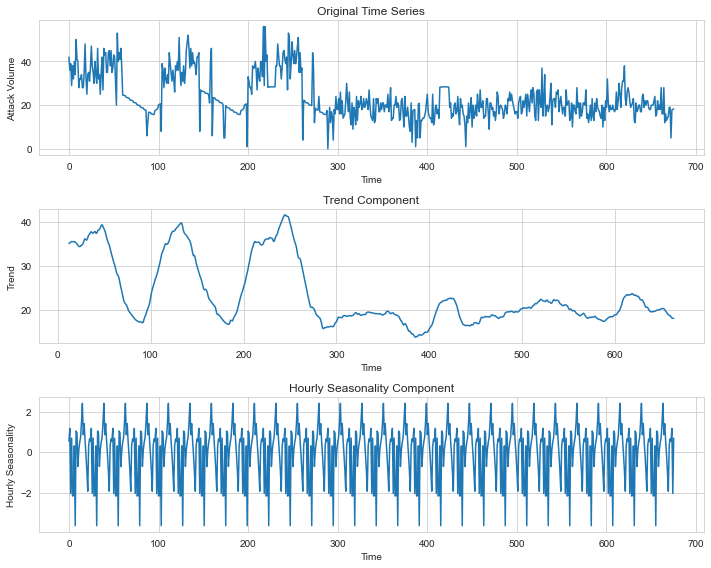

In [221]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# apply seasonal decomposition
result = seasonal_decompose(df1_selected['Attack_Volume'], model='additive', period=24)

# create a figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 8))

# plot the original time series
df1_selected['Attack_Volume'].plot(ax=ax1)
ax1.set_xlabel('Time')
ax1.set_ylabel('Attack Volume')
ax1.set_title('Original Time Series')

# plot the trend component
result.trend.plot(ax=ax2)
ax2.set_xlabel('Time')
ax2.set_ylabel('Trend')
ax2.set_title('Trend Component')

# plot the hourly seasonality component
result.seasonal.plot(ax=ax3)
ax3.set_xlabel('Time')
ax3.set_ylabel('Hourly Seasonality')
ax3.set_title('Hourly Seasonality Component')

# adjust the layout and display the plot
plt.tight_layout()
plt.show()


In [222]:
df1_selected = df1_selected.drop(['Date','Hour_15min'], axis=1)


In [223]:
df1_selected.to_excel('hypmin.xlsx', index=False)
df1_selected

,Attack_Volume
0,42.000000
1,36.000000
2,39.000000
3,29.000000
4,38.000000
...,...
671,19.000000
672,5.000000
673,17.771895
674,18.049987


C:\Users\nsrtk\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


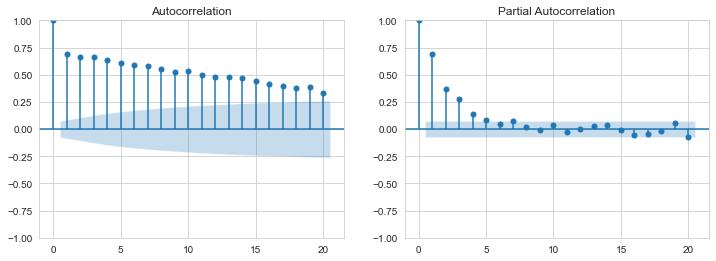

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Load dataset
df = df1_selected # assuming this is your dataset containing the attack volume data

# Calculate the next 10-minute attack volume from past 40 minutes
def create_lagged_features(df, lag=4, window_size=4):
    X = []
    y = []
    for i in range(lag, len(df)):
        X.append(df.iloc[i-window_size:i]['Attack_Volume'].values)
        y.append(df.iloc[i]['Attack_Volume'])
    return np.array(X), np.array(y)

X, y = create_lagged_features(df, lag=4, window_size=4)
next_attack_volume = ARIMA(y, order=(2,0,0)).fit().forecast()

# Plot ACF and PACF to determine p and q values for ARIMA model
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
plot_acf(X[:, -1], lags=20, ax=ax[0])
plot_pacf(X[:, -1], lags=20, ax=ax[1])
plt.show()


C:\Users\nsrtk\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


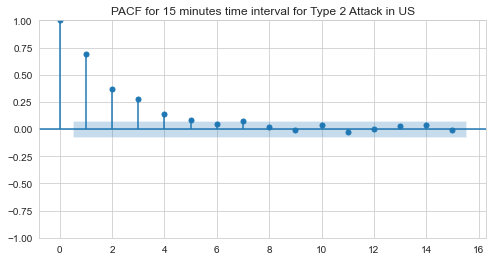

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# Load dataset
df = df1_selected  # assuming this is your dataset containing the attack volume data

# Calculate the next 10-minute attack volume from past 40 minutes
def create_lagged_features(df, lag=4, window_size=4):
    X = []
    y = []
    for i in range(lag, len(df)):
        X.append(df.iloc[i-window_size:i]['Attack_Volume'].values)
        y.append(df.iloc[i]['Attack_Volume'])
    return np.array(X), np.array(y)

X, y = create_lagged_features(df, lag=4, window_size=4)

# Plot PACF to determine p value for ARIMA model
fig, ax = plt.subplots(figsize=(8, 4))
plot_pacf(X[:, -1], lags=15, ax=ax)
plt.title('PACF for 15 minutes time interval for Type 2 Attack in US')
plt.show()


In [226]:
# Load your DataFrame with the selected feature
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import r2_score, mean_squared_error

# Split the data into train and test sets
train_size = int(len(df1_selected) * 0.8)
train_data, test_data = df1_selected[:train_size], df1_selected[train_size:]

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Prepare the data for time series forecasting
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Define the sequence length (in hours)
seq_length = 4

# Create the training sequences
train_X, train_y = create_sequences(train_data, seq_length)

# Create the test sequences
test_X, test_y = create_sequences(test_data, seq_length)

# Reshape the input data for LSTM
train_X = np.reshape(train_X, (train_X.shape[0], seq_length, 1))
test_X = np.reshape(test_X, (test_X.shape[0], seq_length, 1))

# Build and train an LSTM model
model = Sequential()
#model.add(LSTM(units=100, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
#model.add(LSTM(units=50))
model.add(LSTM(units=64, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')
history=model.fit(train_X, train_y, epochs=50, batch_size=32, validation_split=0.2,validation_data=(test_X, test_y))

# Make predictions on the test set
predictions = model.predict(test_X)
lstm_predictions=predictions

# Inverse transform the scaled predictions to their original values
predictions = scaler.inverse_transform(predictions)
test_y = scaler.inverse_transform([test_y])

# Calculate the R^2 score on the test set
r2score = r2_score(test_y[0], predictions[:,0])
lstm_r2=r2score

# Calculate the mean absolute percentage error (MAPE)
#mape = np.mean(np.abs((test_y[0] - predictions[:,0]) / test_y[0])) * 100
non_zero_indices = np.nonzero(test_y)
mape = np.mean(np.abs((test_y[non_zero_indices] - predictions[non_zero_indices, 0]) / test_y[non_zero_indices])) * 100

lstm_mape=mape

# Calculate the mean squared error (MSE)
mse = mean_squared_error(test_y[0], predictions[:,0])

lstm_mse=mse

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)
lstm_rmse=rmse

print("MAPE on test set: {:.2f}%".format(mape))
print("R2 score on test set: {:.7f}%".format(r2score))
print("MSE score on test set: {:.7f}".format(mse))
print("RMSE score on test set: {:.7f}".format(rmse))


Epoch 1/50
14/14 [==============================] - 5s 92ms/step - loss: 0.1769 - val_loss: 0.0324
Epoch 2/50
14/14 [==============================] - 0s 13ms/step - loss: 0.0428 - val_loss: 0.0129
Epoch 3/50
14/14 [==============================] - 0s 13ms/step - loss: 0.0219 - val_loss: 0.0166
Epoch 4/50
14/14 [==============================] - 0s 14ms/step - loss: 0.0179 - val_loss: 0.0096
Epoch 5/50
14/14 [==============================] - 0s 13ms/step - loss: 0.0179 - val_loss: 0.0107
Epoch 6/50
14/14 [==============================] - 0s 14ms/step - loss: 0.0173 - val_loss: 0.0113
Epoch 7/50
14/14 [==============================] - 0s 14ms/step - loss: 0.0168 - val_loss: 0.0101
Epoch 8/50
14/14 [==============================] - 0s 14ms/step - loss: 0.0165 - val_loss: 0.0101
Epoch 9/50
14/14 [==============================] - 0s 13ms/step - loss: 0.0163 - val_loss: 0.0103
Epoch 10/50
14/14 [==============================] - 0s 14ms/step - loss: 0.0161 - val_loss: 0.0095
Epoch 11/

In [227]:
test_y[non_zero_indices]

array([26.        , 25.        , 27.        , 17.        , 21.        ,
       24.        , 20.        , 16.        , 19.        , 19.        ,
       15.        , 27.        , 20.        , 21.        , 22.        ,
       13.        , 14.        , 21.        , 10.        , 20.        ,
       20.        , 17.        , 16.        , 28.        , 19.        ,
       21.        , 14.        , 21.        , 15.        , 17.        ,
       21.        , 21.        , 20.        , 27.        , 14.        ,
       16.        , 12.        , 15.        , 20.        , 13.        ,
       23.        , 15.        , 13.        , 21.        , 17.        ,
       23.        , 19.        , 18.        , 17.        , 15.        ,
       14.        , 20.        , 10.        , 19.        , 13.        ,
       22.        , 19.        , 32.        , 21.        , 17.        ,
       20.        , 18.        , 18.        , 20.        , 18.        ,
       17.        , 18.        , 26.        , 18.        , 22.  

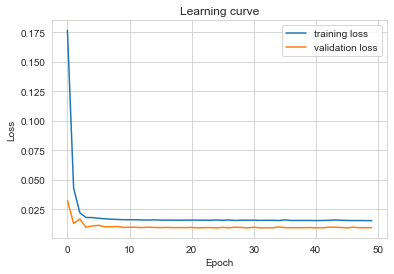

In [228]:
import matplotlib.pyplot as plt



# Plot the learning curve
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Learning curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [229]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error

# Split the data into train and test sets
train_size = int(len(df1_selected) * 0.8)
train_data, test_data = df1_selected[:train_size], df1_selected[train_size:]

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Prepare the data for time series forecasting
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Define the sequence length (in hours)
seq_length = 4

# Create the training sequences
train_X, train_y = create_sequences(train_data, seq_length)

# Create the test sequences
test_X, test_y = create_sequences(test_data, seq_length)

# Reshape the input data for XGBoost
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1] * train_X.shape[2]))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1] * test_X.shape[2]))

# Train an XGBoost model
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    colsample_bytree=1,
    gamma=0,
    learning_rate=0.01,
    max_depth=3,
    min_child_weight=5,
    n_estimators=500,
    reg_lambda=0.9,
    subsample=0.5
)
xgb_model.fit(train_X, train_y)

# Make predictions on the test set
predictions = xgb_model.predict(test_X)

# Inverse transform the scaled predictions and actual values to their original scale
predictions = scaler.inverse_transform(predictions.reshape(-1, 1)).ravel()
test_y = scaler.inverse_transform(test_y.reshape(-1, 1)).ravel()

# Calculate the MAPE, RMSE, and R2 score on the test set
#mape = np.mean(np.abs((test_y - predictions) / test_y)) * 100
non_zero_indices = np.nonzero(test_y)
mape = np.mean(np.abs((test_y[non_zero_indices] - predictions[non_zero_indices]) / test_y[non_zero_indices])) * 100


rmse = np.sqrt(mean_squared_error(test_y, predictions))
r2score = r2_score(test_y, predictions)

print("MAPE on test set: {:.2f}%".format(mape))
print("RMSE on test set: {:.7f}".format(rmse))
print("R2 score on test set: {:.7f}".format(r2score))


MAPE on test set: 21.29%
RMSE on test set: 4.7471186
R2 score on test set: 0.0540174


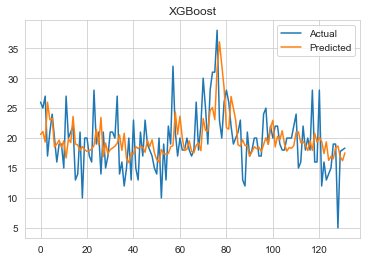

In [230]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.plot(test_y, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.title('XGBoost')
plt.show()


In [231]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Split the data into train and test sets
train_size = int(len(df1_selected) * 0.8)
train_data, test_data = df1_selected[:train_size], df1_selected[train_size:]

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Prepare the data for time series forecasting
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Define the sequence length (in hours)
seq_length = 4

# Create the training sequences
train_X, train_y = create_sequences(train_data, seq_length)

# Create the test sequences
test_X, test_y = create_sequences(test_data, seq_length)

# Reshape the input data for Random Forest
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1] * train_X.shape[2]))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1] * test_X.shape[2]))

# Train a Random Forest model
model = RandomForestRegressor(bootstrap=True, max_depth=5, max_features=0.6, min_samples_leaf=4, min_samples_split=2, n_estimators=90, random_state=100)
model.fit(train_X, train_y)

# Make predictions on the test set
predictions = model.predict(test_X)

# Reverse the scaling
predictions = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()
test_y = scaler.inverse_transform(test_y.reshape(-1, 1)).flatten()

# Calculate the R^2 score, mean squared error and mean absolute percentage error on the test set
mse = mean_squared_error(test_y, predictions)
#mape = np.mean(np.abs((test_y - predictions) / test_y)) * 100
non_zero_indices = np.nonzero(test_y)
mape = np.mean(np.abs((test_y[non_zero_indices] - predictions[non_zero_indices]) / test_y[non_zero_indices])) * 100

r2score = r2_score(test_y, predictions)
rmse = np.sqrt(mse)

print("MAPE on test set: {:.2f}%".format(mape))
print("RMSE on test set: {:.2f}".format(rmse))
print("R2 score on test set: {:.7f}".format(r2score))

# Save the metrics in variables
RF_mape = mape
RF_rmse = rmse
RF_r2score = r2score


C:\Users\nsrtk\AppData\Local\Temp/ipykernel_26324/2457816573.py:37: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_X, train_y)


MAPE on test set: 21.08%
RMSE on test set: 4.73
R2 score on test set: 0.0615624


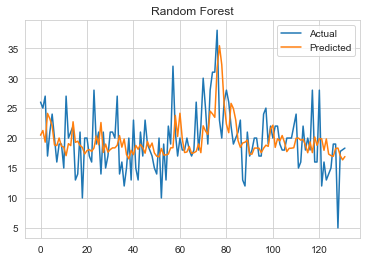

In [232]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.plot(test_y, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.title('Random Forest')
plt.show()


In [233]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Split the data into train and test sets
train_size = int(len(df1_selected) * 0.8)
train_data, test_data = df1_selected[:train_size], df1_selected[train_size:]

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Prepare the data for time series forecasting
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Define the sequence length (in hours)
seq_length = 4

# Create the training sequences
train_X, train_y = create_sequences(train_data, seq_length)

# Create the test sequences
test_X, test_y = create_sequences(test_data, seq_length)

# Reshape the input data for SVM
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1] * train_X.shape[2]))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1] * test_X.shape[2]))

# Train an SVM model
#model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
#model = SVR(C=100, kernel='rbf', gamma=0.1, epsilon=0.01, degree=2)
model = SVR( C=100,degree=2,epsilon=0.001,gamma=0.1,kernel='rbf')
model.fit(train_X, train_y)

# Make predictions on the test set
predictions = model.predict(test_X)
SVR_predictions=predictions

# Reverse transform the data
predictions = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()
test_y = scaler.inverse_transform(test_y.reshape(-1, 1)).flatten()

# Calculate the mean squared error on the test set


# Calculate the mean absolute percentage error (MAPE) on the test set
#mape = np.mean(np.abs((test_y - predictions) / test_y)) * 100
# Calculate the absolute percentage errors
non_zero_indices = np.nonzero(test_y)
mape = np.mean(np.abs((test_y[non_zero_indices] - predictions[non_zero_indices]) / test_y[non_zero_indices])) * 100
SVR_mape = mape
mse = mean_squared_error(test_y[non_zero_indices], predictions[non_zero_indices])
SVR_mse = mse

# Calculate the root mean squared error (RMSE) on the test set
rmse = np.sqrt(mse)
SVR_rmse = rmse

# Calculate the R2 score on the test set
r2score = r2_score(test_y, predictions)
SVR_r2score = r2score

print("MAPE on test set: {:.2f}%".format(mape))
print("RMSE on test set: {:.7f}".format(rmse))
print("R2 score on test set: {:.7f}".format(r2score))


MAPE on test set: 21.25%
RMSE on test set: 4.7248975
R2 score on test set: 0.0628529


C:\Users\nsrtk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [234]:
df = pd.DataFrame({'test_y': test_y})

# Save the DataFrame to an Excel file
df.to_excel('test_y.xlsx', index=False)

df = pd.DataFrame({'predictions': predictions})

# Save the DataFrame to an Excel file
df.to_excel('predictions.xlsx', index=False)

In [235]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split the data into train and test sets
train_size = int(len(df1_selected) * 0.8)
train_data, test_data = df1_selected[:train_size], df1_selected[train_size:]

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Prepare the data for time series forecasting
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Define the sequence length (in hours)
seq_length = 4

# Create the training sequences
train_X, train_y = create_sequences(train_data, seq_length)

# Create the test sequences
test_X, test_y = create_sequences(test_data, seq_length)

# Reshape the input data for KNN
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1] * train_X.shape[2]))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1] * test_X.shape[2]))

# Train a KNN model
#model = KNeighborsRegressor(n_neighbors=15)
model = KNeighborsRegressor(n_neighbors=15, weights='uniform', algorithm='ball_tree', p=2)

model.fit(train_X, train_y)

# Make predictions on the test set
predictions = model.predict(test_X)

# Reverse transform the predicted and actual values
predictions = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()
test_y = scaler.inverse_transform(test_y.reshape(-1, 1)).flatten()

# Calculate the R^2 score, mean squared error, and MAPE on the test set
r2_score = r2_score(test_y, predictions)
mse = mean_squared_error(test_y, predictions)
#mape = np.mean(np.abs((test_y - predictions) / test_y)) * 100
non_zero_indices = np.nonzero(test_y)
mape = np.mean(np.abs((test_y[non_zero_indices] - predictions[non_zero_indices]) / test_y[non_zero_indices])) * 100
rmse = np.sqrt(mse)

print("R^2 score on test set: {:.7f}".format(r2_score))
print("MAPE on test set: {:.2f}%".format(mape))
print("RMSE on test set: {:.2f}".format(rmse))


R^2 score on test set: -0.0013623
MAPE on test set: 21.10%
RMSE on test set: 4.88


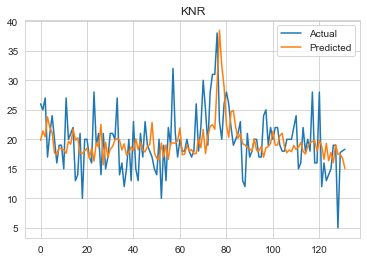

In [236]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.plot(test_y, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.title('KNR')
plt.show()


In [237]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split the data into train and test sets
train_size = int(len(df1_selected) * 0.8)
train_data, test_data = df1_selected[:train_size], df1_selected[train_size:]

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Prepare the data for time series forecasting
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Define the sequence length (in hours)
seq_length = 4

# Create the training sequences
train_X, train_y = create_sequences(train_data, seq_length)

# Create the test sequences
test_X, test_y = create_sequences(test_data, seq_length)

# Reshape the input data for linear regression
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1] * train_X.shape[2]))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1] * test_X.shape[2]))

# Train a linear regression model
lr_model = LinearRegression(fit_intercept=True, normalize=False)
lr_model.fit(train_X, train_y)

# Make predictions on the test set
predictions = lr_model.predict(test_X)
lr_predictions=predictions

# Reverse transform the data
test_y_inv = scaler.inverse_transform(test_y.reshape(-1, 1))
lr_predictions_inv = scaler.inverse_transform(predictions.reshape(-1, 1))
lr_predictions=lr_predictions_inv

# Calculate the R^2 score, mean squared error, and root mean squared error on the test set
r2_score = r2_score(test_y_inv, lr_predictions_inv)
lr_r2=r2_score
mse = mean_squared_error(test_y_inv, lr_predictions_inv)
lr_mse=mse
rmse = np.sqrt(mse)
lr_rmse=rmse
#mape = np.mean(np.abs((test_y_inv - lr_predictions_inv) / test_y_inv)) * 100
non_zero_indices = np.nonzero(test_y_inv)
mape = np.mean(np.abs((test_y_inv[non_zero_indices] - lr_predictions_inv[non_zero_indices]) / test_y_inv[non_zero_indices])) * 100

print("R^2 score on test set: {:.7f}".format(r2_score))
print("MSE on test set: {:.7f}".format(mse))
print("RMSE on test set: {:.7f}".format(rmse))
print("MAPE on test set: {:.2f}%".format(mape))


R^2 score on test set: 0.0711729
MSE on test set: 22.1264576
RMSE on test set: 4.7038769
MAPE on test set: 22.07%


C:\Users\nsrtk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


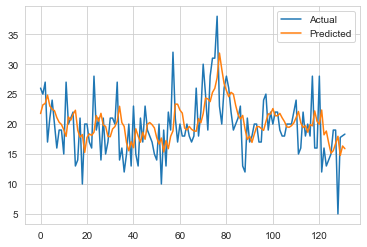

In [238]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.plot(test_y_inv, label='Actual')
plt.plot(lr_predictions_inv, label='Predicted')
plt.legend()
plt.show()


In [239]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.models import Sequential
import tensorflow as tf


# Split the data into train and test sets
train_size = int(len(df1_selected) * 0.8)
train_data, test_data = df1_selected[:train_size], df1_selected[train_size:]

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Prepare the data for time series forecasting
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Define the sequence length (in hours)
seq_length = 4

# Create the training sequences
train_X, train_y = create_sequences(train_data, seq_length)

# Create the test sequences
test_X, test_y = create_sequences(test_data, seq_length)

# Reshape the input data for RNN
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))

optimizerr = tf.keras.optimizers.Adam(learning_rate=0.01)

# Train an RNN model
model = Sequential()
#model.add(SimpleRNN(units=50,activation='relu',kernel_regularizer=l2(0.001), input_shape=(seq_length, 1)))
model.add(SimpleRNN(units=50,activation='relu',input_shape=(seq_length, 1))) 
model.add(Dense(units=25))
model.add(Dense(units=1))
model.compile(optimizer=optimizerr, loss='mean_squared_error')

history=model.fit(train_X, train_y, epochs=50, batch_size=32,validation_data=(test_X, test_y))

# Make predictions on the test set
predictions = model.predict(test_X)
rnn_predictions = scaler.inverse_transform(predictions)
test_y = scaler.inverse_transform(test_y)

# Calculate the R^2 score and mean squared error on the test set
r2 = r2_score(test_y, rnn_predictions)
rnn_r2 = r2

#mape = np.mean(np.abs((test_y - rnn_predictions) / test_y)) * 100
non_zero_indices = np.nonzero(test_y)
mape = np.mean(np.abs((test_y[non_zero_indices] - rnn_predictions[non_zero_indices]) / test_y[non_zero_indices])) * 100
mse = mean_squared_error(test_y[non_zero_indices], rnn_predictions[non_zero_indices])
rnn_mse = mse
rmse = np.sqrt(mse)

print("R^2 score on test set: {:.7f}".format(r2))
print("RMSE on test set: {:.7f}".format(rmse))
print("MAPE on test set: {:.2f}%".format(mape))


Epoch 1/50
17/17 [==============================] - 3s 35ms/step - loss: 0.0462 - val_loss: 0.0104
Epoch 2/50
17/17 [==============================] - 0s 8ms/step - loss: 0.0171 - val_loss: 0.0091
Epoch 3/50
17/17 [==============================] - 0s 9ms/step - loss: 0.0163 - val_loss: 0.0110
Epoch 4/50
17/17 [==============================] - 0s 9ms/step - loss: 0.0157 - val_loss: 0.0076
Epoch 5/50
17/17 [==============================] - 0s 9ms/step - loss: 0.0141 - val_loss: 0.0072
Epoch 6/50
17/17 [==============================] - 0s 9ms/step - loss: 0.0136 - val_loss: 0.0070
Epoch 7/50
17/17 [==============================] - 0s 8ms/step - loss: 0.0130 - val_loss: 0.0095
Epoch 8/50
17/17 [==============================] - 0s 9ms/step - loss: 0.0158 - val_loss: 0.0091
Epoch 9/50
17/17 [==============================] - 0s 9ms/step - loss: 0.0140 - val_loss: 0.0081
Epoch 10/50
17/17 [==============================] - 0s 9ms/step - loss: 0.0136 - val_loss: 0.0077
Epoch 11/50
17/17 

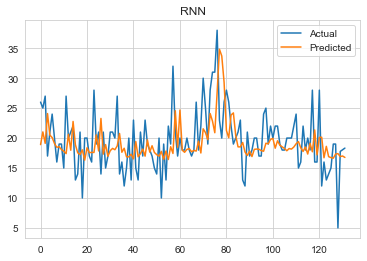

In [240]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.plot(test_y, label='Actual')
plt.plot(rnn_predictions, label='Predicted')
plt.title('RNN')
plt.legend()
plt.show()


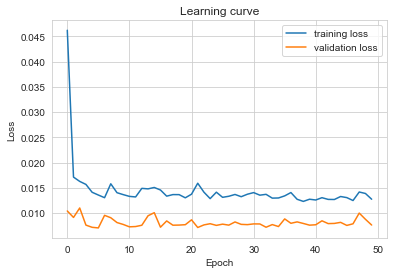

In [241]:
import matplotlib.pyplot as plt



# Plot the learning curve
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Learning curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


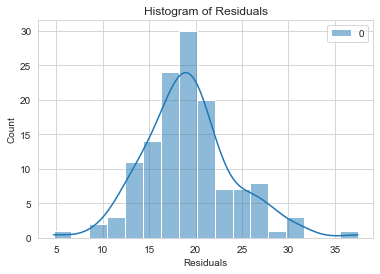

C:\Users\nsrtk\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


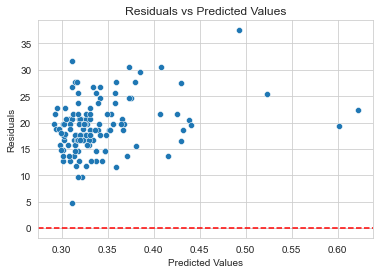

In [242]:
# Examine the distribution of the residuals
import matplotlib.pyplot as plt
import seaborn as sns

residuals = test_y - predictions

# Plot a histogram of the residuals
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.show()

# Plot a scatterplot of the residuals vs the predicted values
predictions = predictions.ravel()
residuals = residuals.ravel()
sns.scatterplot(predictions, residuals)
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color="r", linestyle="--")
plt.show()


The histogram will show the distribution of the residuals. If it closely resembles a normal distribution, then the residuals are normally distributed. The scatterplot will show if there is any pattern in the residuals. If the residuals are randomly scattered around the horizontal line at y=0, then there is no pattern in the residuals. If the residuals are not normally distributed or exhibit a pattern, then your data may not be suitable for multi-step forecasting.

In [252]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
import numpy as np
from tensorflow.keras import regularizers
# Split the data into train and test sets
train_size = int(len(df1_selected) * 0.8)
train_data, test_data = df1_selected[:train_size], df1_selected[train_size:]

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Prepare the data for time series forecasting
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Define the sequence length (in hours)
seq_length = 4

# Create the training sequences
train_X, train_y = create_sequences(train_data, seq_length)

# Create the test sequences
test_X, test_y = create_sequences(test_data, seq_length)

# Reshape the input data for CNN
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))
optimizerr = tf.keras.optimizers.Adam(learning_rate=0.01)

# Build a 1D CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(seq_length, 1)))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
cnn_model.add(Dense(25, activation='relu'))
cnn_model.add(Dense(10, activation='relu'))
cnn_model.add(Dense(1))
cnn_model.compile(optimizer=optimizerr, loss='mse')

# Train the model
history=cnn_model.fit(train_X, train_y, epochs=50, batch_size=32, verbose=0,validation_data=(test_X, test_y))

# Make predictions on the test set
predictions = cnn_model.predict(test_X)
cnn_predictions = predictions
cnn_predictions = np.squeeze(np.ravel(cnn_predictions))

# Inverse transform the predictions and actual values
test_y_inverse = scaler.inverse_transform(test_y.reshape(-1, 1))
cnn_predictions_inverse = scaler.inverse_transform(cnn_predictions.reshape(-1, 1))
cnn_predictions=cnn_predictions_inverse

# Calculate the R^2 score and mean squared error on the test set
r2 = r2_score(test_y_inverse, cnn_predictions_inverse)
cnn_r2 = r2

#mape = np.mean(np.abs((test_y_inverse - cnn_predictions_inverse) / test_y_inverse)) * 100
non_zero_indices = np.nonzero(test_y_inverse)
mape = np.mean(np.abs((test_y_inverse[non_zero_indices] - cnn_predictions_inverse[non_zero_indices]) / test_y_inverse[non_zero_indices])) * 100
mse = mean_squared_error(test_y_inverse[non_zero_indices] , cnn_predictions_inverse[non_zero_indices])
rmse = np.sqrt(mse)
cnn_mse = mse
print("R^2 score on test set: {:.7f}".format(r2))
print("RMSE on test set: {:.7f}".format(rmse))
print("MAPE on test set: {:.2f}%".format(mape))


R^2 score on test set: 0.1263342
RMSE on test set: 4.5620619
MAPE on test set: 19.93%


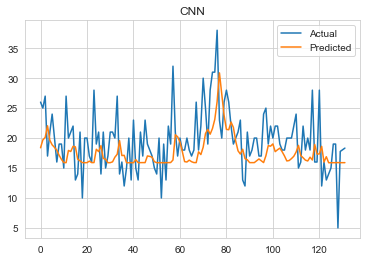

In [244]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.plot(test_y_inverse, label='Actual')
plt.plot(cnn_predictions, label='Predicted')
plt.title('CNN')
plt.legend()
plt.show()


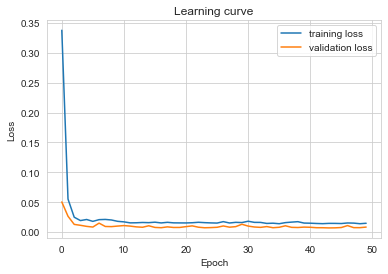

In [245]:
import matplotlib.pyplot as plt



# Plot the learning curve
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Learning curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [254]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.preprocessing import MinMaxScaler


# Split the data into train and test sets
train_size = int(len(df1_selected) * 0.8)
train_data, test_data = df1_selected[:train_size], df1_selected[train_size:]

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Prepare the data for time series forecasting
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Define the sequence length (in hours)
seq_length = 4

# Create the training sequences
train_X, train_y = create_sequences(train_data[:, 0], seq_length)

# Create the test sequences
test_X, test_y = create_sequences(test_data[:, 0], seq_length)

# Reshape the input data for ARIMA
train_X = train_X.reshape(train_X.shape[0], -1)
test_X = test_X.reshape(test_X.shape[0], -1)

# Train an ARIMA model
model = ARIMA(train_y, order=(7, 0, 4))
#model = ExponentialSmoothing(train_y)

model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.forecast(len(test_X))

# Reverse transform the predictions and actual values
predictions = scaler.inverse_transform(predictions.reshape(-1, 1)).ravel()
test_y = scaler.inverse_transform(test_y.reshape(-1, 1)).ravel()

# Calculate the R^2 score, mean squared error, and MAPE on the test set
r2score = r2_score(test_y, predictions)
ARIMA_r2=r2score
mse = mean_squared_error(test_y, predictions)
ARIMA_mse=mse
rmse = np.sqrt(mse)
#mape = np.mean(np.abs((test_y - predictions) / test_y)) * 100
non_zero_indices = np.nonzero(test_y)
mape = np.mean(np.abs((test_y[non_zero_indices] - predictions[non_zero_indices]) / test_y[non_zero_indices])) * 100
ARIMA_mape=mape

print("R^2 score on test set: {:.7f}".format(r2score))
print("RMSE on test set: {:.7f}".format(rmse))
print("MAPE on test set: {:.2f}%".format(mape))


R^2 score on test set: -0.6974037
RMSE on test set: 6.3588866
MAPE on test set: 33.84%


C:\Users\nsrtk\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


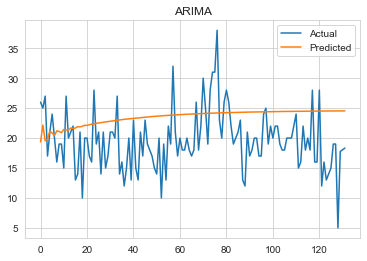

In [255]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.plot(test_y, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('ARIMA')
plt.legend()
plt.show()


In [256]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate the weights based on the R^2 score of each model
#rnn_weight = rnn_r2 / (rnn_r2 + lr_r2)
#lr_weight = lr_r2 / (rnn_r2 + lr_r2)
mse_total = rnn_mse + lr_mse
rnn_weight = 1 - (rnn_mse / mse_total)
lr_weight = 1 - (lr_mse / mse_total)
lr_predictions = np.squeeze(np.ravel(lr_predictions))
rnn_predictions = np.squeeze(np.ravel(rnn_predictions))

# Calculate the weighted average of the predictions
final_predictions = rnn_weight * rnn_predictions + lr_weight * lr_predictions
final_predictions = np.squeeze(np.ravel(final_predictions))


# Calculate the R^2 score, mean squared error, and MAPE of the hybrid model
hybrid_r2 = r2_score(test_y, final_predictions)
hybrid_mse = mean_squared_error(test_y, final_predictions)
#hybrid_mape = np.mean(np.abs((test_y - final_predictions) / test_y)) * 100
non_zero_indices = np.nonzero(test_y)
hybrid_mape = np.mean(np.abs((test_y[non_zero_indices] - final_predictions[non_zero_indices]) / test_y[non_zero_indices])) * 100

hybrid_rmse = np.sqrt(mse)
print("Hybrid model R^2 score on test set: {:.7f}".format(hybrid_r2))
print("Hybrid model RMSE on test set: {:.7f}".format(hybrid_rmse))
print("Hybrid model MAPE on test set: {:.2f}%".format(hybrid_mape))


Hybrid model R^2 score on test set: 0.0765262
Hybrid model RMSE on test set: 6.3588866
Hybrid model MAPE on test set: 21.22%


In [257]:

from sklearn.metrics import r2_score, mean_squared_error

# Calculate the weights based on the R^2 score of each model
#rnn_weight = rnn_r2 / (rnn_r2 + cnn_r2)
#cnn_weight = cnn_r2 / (rnn_r2 + cnn_r2)
mse_total = rnn_mse + cnn_mse
rnn_weight = 1 - (rnn_mse / mse_total)
cnn_weight = 1 - (cnn_mse / mse_total)

cnn_predictions = np.squeeze(np.ravel(cnn_predictions))

# Calculate the weighted average of the predictions
final_predictions = rnn_weight * rnn_predictions + cnn_weight * cnn_predictions
final_predictions = np.squeeze(np.ravel(final_predictions))

# Calculate the R^2 score, mean squared error, and MAPE of the hybrid model
hybrid_r2 = r2_score(test_y, final_predictions)
hybrid_mse = mean_squared_error(test_y, final_predictions)
hybrid_rmse = np.sqrt(hybrid_mse)
#hybrid_mape = np.mean(np.abs((test_y - final_predictions) / test_y)) * 100
non_zero_indices = np.nonzero(test_y)
hybrid_mape = np.mean(np.abs((test_y[non_zero_indices] - final_predictions[non_zero_indices]) / test_y[non_zero_indices])) * 100

print("Hybrid model R^2 score on test set: {:.7f}".format(hybrid_r2))
print("Hybrid model MSE on test set: {:.7f}".format(hybrid_rmse))
print("Hybrid model MAPE on test set: {:.2f}%".format(hybrid_mape))


Hybrid model R^2 score on test set: 0.0835895
Hybrid model MSE on test set: 4.6723304
Hybrid model MAPE on test set: 20.17%


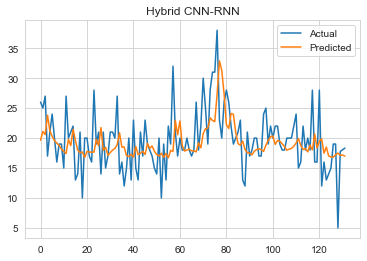

In [258]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.plot(test_y, label='Actual')
plt.plot(final_predictions, label='Predicted')
plt.title('Hybrid CNN-RNN')
plt.legend()
plt.show()


In [187]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate the weights based on the R^2 score of each model
#rnn_weight = rnn_r2 / (rnn_r2 + lr_r2)
#lr_weight = lr_r2 / (rnn_r2 + lr_r2)
mse_total = lstm_mse + SVR_mse
lstm_weight = 1 - (lstm_mse / mse_total)
SVR_weight = 1 - (SVR_mse / mse_total)
lstm_predictions = np.squeeze(np.ravel(lstm_predictions))
SVR_predictions = np.squeeze(np.ravel(SVR_predictions))

# Calculate the weighted average of the predictions
final_predictions = lstm_weight * lstm_predictions + SVR_weight * SVR_predictions
final_predictions = np.squeeze(np.ravel(final_predictions))


# Calculate the R^2 score, mean squared error, and MAPE of the hybrid model
hybrid_r2 = r2_score(test_y, final_predictions)
hybrid_mse = mean_squared_error(test_y, final_predictions)
#hybrid_mape = np.mean(np.abs((test_y - final_predictions) / test_y)) * 100
non_zero_indices = np.nonzero(test_y)
hybrid_mape = np.mean(np.abs((test_y[non_zero_indices] - final_predictions[non_zero_indices]) / test_y[non_zero_indices])) * 100
hybrid_rmse = np.sqrt(mse)
print("Hybrid model R^2 score on test set: {:.7f}".format(hybrid_r2))
print("Hybrid model RMSE on test set: {:.7f}".format(hybrid_rmse))
print("Hybrid model MAPE on test set: {:.2f}%".format(hybrid_mape))


Hybrid model R^2 score on test set: -15.5990709
Hybrid model RMSE on test set: 6.3588866
Hybrid model MAPE on test set: 98.12%


In [188]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate the weights based on the R^2 score of each model
#rnn_weight = rnn_r2 / (rnn_r2 + lr_r2)
#lr_weight = lr_r2 / (rnn_r2 + lr_r2)
mse_total = lstm_mse + lr_mse
lstm_weight = 1 - (lstm_mse / mse_total)
lr_weight = 1 - (lr_mse / mse_total)
lr_predictions = np.squeeze(np.ravel(lr_predictions))
lstm_predictions = np.squeeze(np.ravel(lstm_predictions))

# Calculate the weighted average of the predictions
final_predictions = lstm_weight * lstm_predictions + lr_weight * lr_predictions
final_predictions = np.squeeze(np.ravel(final_predictions))


# Calculate the R^2 score, mean squared error, and MAPE of the hybrid model
hybrid_r2 = r2_score(test_y, final_predictions)
hybrid_mse = mean_squared_error(test_y, final_predictions)
#hybrid_mape = np.mean(np.abs((test_y - final_predictions) / test_y)) * 100
non_zero_indices = np.nonzero(test_y)
hybrid_mape = np.mean(np.abs((test_y[non_zero_indices] - final_predictions[non_zero_indices]) / test_y[non_zero_indices])) * 100
hybrid_rmse = np.sqrt(mse)
print("Hybrid model R^2 score on test set: {:.7f}".format(hybrid_r2))
print("Hybrid model RMSE on test set: {:.7f}".format(hybrid_rmse))
print("Hybrid model MAPE on test set: {:.2f}%".format(hybrid_mape))


Hybrid model R^2 score on test set: -3.6906546
Hybrid model RMSE on test set: 6.3588866
Hybrid model MAPE on test set: 46.70%
